In [4]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [5]:
data=input_data.read_data_sets("data/MNIST/",one_hot=True) 
#one_hot= Whether to make the labels into a binary array

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
print("Size of:")
print("Training set \t\t{}".format(len(data.train.labels)))
print("Test set\t\t{}".format(len(data.test.labels)))
print("Validation set\t\t{}".format(len(data.validation.labels)))

Size of:
Training set 		55000
Test set		10000
Validation set		5000


In [7]:
data.test.cls=np.array([label.argmax() for label in data.test.labels])

In [8]:
imgSize=28
imgSizeFlat=imgSize*imgSize
imgShape=(imgSize,imgSize)
noClasses=10
batchSize=100

In [9]:
def plotImages(images,clsTarget,clsPred=None):
    assert len(images)==len(clsTarget)==9
    fig,axes=plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    
    for idx,ax in enumerate(axes.flat):
        ax.imshow(images[idx].reshape(imgShape),cmap='binary')
        if clsPred.all()==None:
            ax.set_xlabel("True: {}".format(clsTarget[idx]))
        else:
            ax.set_xlabel("True: {} Predicted: {}".format(clsTarget[idx],clsPred[idx]))
            
        ax.set_xticks([])
        ax.set_yticks([])
        
        
    


AttributeError: 'NoneType' object has no attribute 'all'

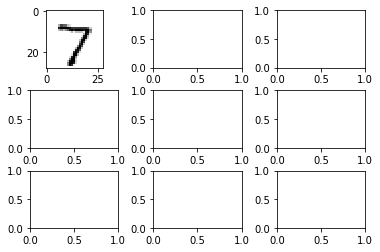

In [11]:
images=data.test.images[0:9]
clsTarget=data.test.labels[0:9]
plotImages(images,clsTarget)

In [12]:
x=tf.placeholder(tf.float32,[None,imgSizeFlat])#(dataType,[dataCount,dataSize])
yTarget=tf.placeholder(tf.float32,[None,noClasses])
yTargetClass=tf.placeholder(tf.int64,[None])
w=tf.Variable(tf.zeros([imgSizeFlat,noClasses]))
b=tf.Variable(tf.zeros([noClasses]))

wxb=tf.matmul(x,w)+b
yPred=tf.nn.softmax(wxb)
yPredClass=tf.argmax(yPred,axis=1)



In [13]:
crossEntropy=tf.nn.softmax_cross_entropy_with_logits(logits=wxb,labels=yTarget)
cost=tf.reduce_mean(crossEntropy)
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
correctPrediction=tf.equal(yPredClass,yTargetClass)
accuracy=tf.reduce_mean(tf.cast(correctPrediction,tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
ses=tf.Session()
ses.run(tf.global_variables_initializer())

In [15]:
def optimize(noIterations):
    for i in range(noIterations):
        xBatch,yTargetBatch=data.train.next_batch(batchSize)
        feedDictTrain={x:xBatch,yTarget:yTargetBatch} 
        #Putting the batch into a dictionary with placeholder variable names
        ses.run(optimizer,feed_dict=feedDictTrain)
        

In [16]:
feedDictTest={x : data.test.images,
            yTarget : data.test.labels,
            yTargetClass : data.test.cls}

def printAccuracy():
    acc=ses.run(accuracy,feed_dict=feedDictTest)
    print("Accuracy on test set: {}".format(acc))

def printConfusionMatrix():
    classTarget=data.test.cls
    classPred=ses.run(yPredClass,feed_dict=feedDictTest)
    confMat=confusion_matrix(y_true=classTarget,y_pred=classPred)#sklearn
    print(confMat)
    
    
    plt.imshow(confMat, interpolation='nearest', cmap=plt.cm.Blues)
    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(noClasses)
    plt.xticks(tick_marks, range(noClasses))
    plt.yticks(tick_marks, range(noClasses))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [17]:
def plot9Errors():
    correct, clsPred = ses.run([correctPrediction, yPredClass],
                                    feed_dict=feedDictTest)
    incorrect = (correct == False)
    images = data.test.images[incorrect]
    clsPred = clsPred[incorrect]

    # Get the true classes for those images.
    clsTrue = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plotImages(images=images[0:9],
               clsPred=clsPred[0:9], 
               clsTarget=clsTrue[0:9]
                )
    

In [18]:
def plotWeights():
    # Get the values for the weights from the TensorFlow variable.
    ww = ses.run(w)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(ww)
    w_max = np.max(ww)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = ww[:, i].reshape(imgShape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Accuracy on test set: 0.09799999743700027


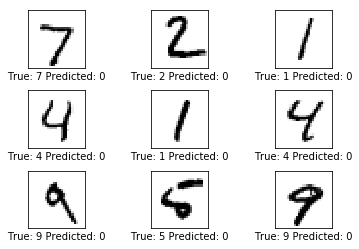

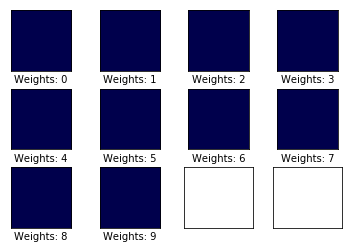

[[ 980    0    0    0    0    0    0    0    0    0]
 [1135    0    0    0    0    0    0    0    0    0]
 [1032    0    0    0    0    0    0    0    0    0]
 [1010    0    0    0    0    0    0    0    0    0]
 [ 982    0    0    0    0    0    0    0    0    0]
 [ 892    0    0    0    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0    0    0    0]
 [1028    0    0    0    0    0    0    0    0    0]
 [ 974    0    0    0    0    0    0    0    0    0]
 [1009    0    0    0    0    0    0    0    0    0]]


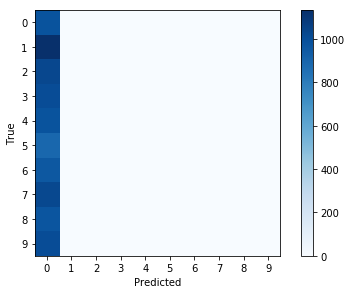

In [19]:
printAccuracy()
plot9Errors()
plotWeights()
printConfusionMatrix()

Accuracy on test set: 0.7207000255584717


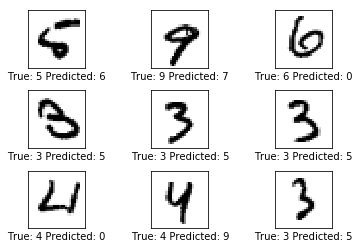

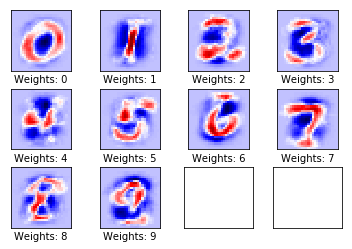

[[850   0   5   0   0  94  29   1   1   0]
 [  0 997  17   0   0  24   7   0  90   0]
 [ 14  10 870   0   2  10  48  25  42  11]
 [  7   4  95  32   0 775  13  32  47   5]
 [  7   7  20   0 524  78  76  18  22 230]
 [ 17   7  12   0   2 794  26   8  22   4]
 [ 15   2  39   0   1  28 870   2   1   0]
 [  3  35  33   0   1   5   5 913  14  19]
 [  7   6  23   0   1 278  30  25 602   2]
 [ 17   9  15   0   2  98   7  94  12 755]]


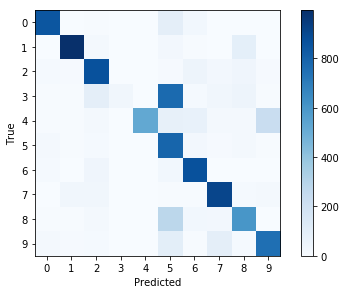

In [20]:
optimize(noIterations=9)
printAccuracy()
plot9Errors()
plotWeights()
printConfusionMatrix()

Accuracy on test set: 0.9139999747276306


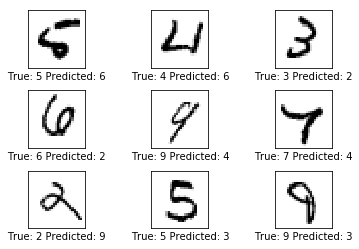

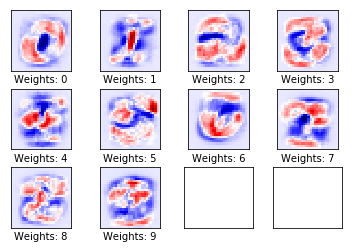

[[ 962    0    3    3    0    1    9    1    1    0]
 [   0 1109    2    3    1    1    4    2   13    0]
 [   8    5  929   21    6    1   15   10   30    7]
 [   3    0   20  955    0    8    2    8    8    6]
 [   1    2    8    2  913    0   13    2    4   37]
 [  10    3    8   72   10  734   20    7   20    8]
 [  13    3    4    2    9   11  914    1    1    0]
 [   3    8   26   11    7    1    0  938    1   33]
 [   9    8   11   76   10   33   13   11  789   14]
 [  11    7    3   18   43    5    0   21    4  897]]


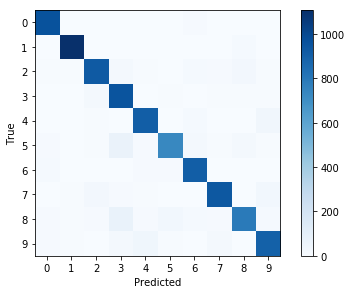

In [21]:
optimize(noIterations=999)
printAccuracy()
plot9Errors()
plotWeights()
printConfusionMatrix()